In [1]:
%load_ext lab_black

In [2]:
%matplotlib widget

In [3]:
from diviner import file_utils as fu
import pandas as pd
from diviner import calib
from diviner import div_l1a_fix

In [4]:
root = "/Users/maye/data/diviner/l1a_data/"

read in the previously defined scaling factors

In [5]:
factors = div_l1a_fix.factors

read in the data, but only from column 59, which is where the science data starts. The result has 189 columns, for all Diviner detectors.

In [6]:
# columns = arange(59, 248, dtype=int)
# olddata = loadtxt(root+'2012011400_L1A.TAB', delimiter=',',skiprows=8,
#                usecols=columns)
tstr = "2010120102"
tstr = "2012011400"
tstr = "2012071305"
data = fu.get_clean_l1a(tstr)

In [7]:
data.shape

(28128, 257)

In [8]:
c = calib.Calibrator(data, fix_noise=True)

/u/paige/maye/src/diviner/diviner/div_l1a_fix.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch1and2["averaged"] = ch1and2.mean(axis=1)
/u/paige/maye/src/diviner/diviner/div_l1a_fix.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch1and2["convolved"] = np.convolve(ch1and2["averaged"], boxcar, mode="same")
/u/paige/maye/src/diviner/diviner/div_l1a_fix.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [9]:
from diviner.plot_utils import plot_all_calib_blocks, plot_calib_block

In [10]:
calib_ids = data.calib_block_labels.unique().tolist()

In [11]:
plot_calib_block(data, "calib", 6, det="b3_11")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
ch1and2 = data.filter(regex="a[1,2]_").copy()

In [13]:
ch1 = data.filter(regex="a1_").copy()
ch2 = data.filter(regex="a2_").copy()

In [14]:
ch1and2.shape

(28128, 42)

In [15]:
averaged = np.average(ch1and2, axis=1)
ch1and2["averaged"] = averaged

In [16]:
t1 = "20120713 5:49"
t2 = "20120713 5:52"
ch1and2[t1:t2].filter(regex="a2_").plot()
plt.title("CH 2")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'CH 2')

In [17]:
ch1and2["a1_11 a2_11 averaged".split()].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

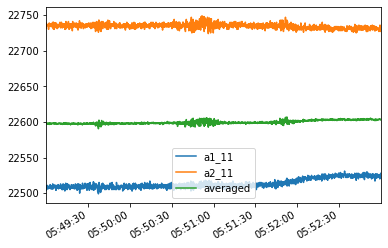

In [16]:
ch1and2[t1:t2]["a1_11 a2_11 averaged".split()].plot()

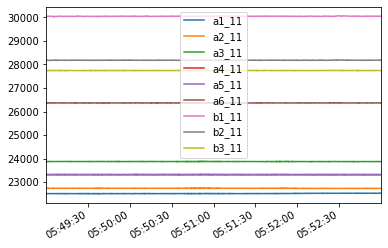

In [17]:
data["20120713 5:49":"20120713 5:52"].filter(regex="_11").plot()

In [18]:
ch1and2["rolling_mean"] = ch1and2.averaged.rolling(window=75, center=True).mean()

In [19]:
ch1and2["noise"] = ch1and2["averaged"] - ch1and2["rolling_mean"]

Text(0.5, 0.98, 'NOISE = AVERAGE - ROLLING_MEAN (BOXCAR)')

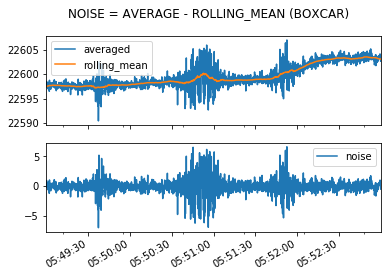

In [20]:
fig, ax = plt.subplots(nrows=2, sharex=True)
ch1and2[t1:t2][["averaged", "rolling_mean"]].plot(ax=ax[0])
ch1and2[t1:t2][["noise"]].plot(alpha=1.0, ax=ax[1])
fig.suptitle("NOISE = AVERAGE - ROLLING_MEAN (BOXCAR)")

In [21]:
length = data.shape[0]
length

28128

In [22]:
c1 = np.zeros((length, 21, 81))
c2 = np.zeros((length, 21, 81))

In [23]:
for i in range(0, 81):
    c1[40 : length - 40, :, i] = ch1.iloc[i : length - 80 + i]
    c2[40 : length - 40, :, i] = ch2.iloc[i : length - 80 + i]

In [24]:
from numpy import ma, transpose, dstack

In [25]:
max_diff1 = ma.max(ma.max(c1, axis=2) - ma.min(c1, axis=2), axis=1)
max_diff2 = ma.max(ma.max(c2, axis=2) - ma.min(c2, axis=2), axis=1)
max_diff = ma.max(transpose(dstack((max_diff1, max_diff2)), (1, 0, 2)), axis=2)

In [26]:
mydiff1 = ma.max(c1.max(axis=2) - c1.min(axis=2), axis=1)
mydiff2 = ma.max(c2.max(axis=2) - c2.min(axis=2), axis=1)
mydiff = ma.max(transpose(dstack((mydiff1, mydiff2)), (1, 0, 2)), axis=2)

In [27]:
ch1and2.noise.shape

(28128,)

In [28]:
max_diff.shape

(28128, 1)

In [29]:
noise = ch1and2.noise.where(max_diff.flatten() <= 50, 0)

In [30]:
noise[:40] = 0

In [31]:
noise[length - 40 : length] = 0

Text(0.5, 1.0, 'Correction factors')

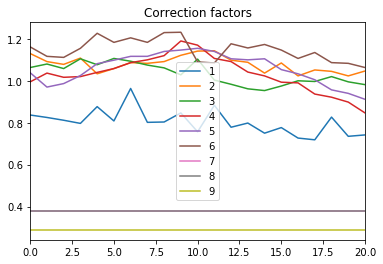

In [32]:
pd.DataFrame(factors, columns=range(1, 10)).plot()
plt.title("Correction factors")

In [33]:
i = 3

In [34]:
row = factors[:, 5]

In [35]:
row.shape

(21,)

In [36]:
row

array([1.16166665, 1.11666665, 1.11166666, 1.15499997, 1.22666661,
       1.18333332, 1.20499996, 1.1833333 , 1.22999998, 1.23166662,
       1.08999997, 1.08499997, 1.17666666, 1.15666668, 1.17333333,
       1.14666667, 1.10666664, 1.13499999, 1.08666664, 1.08333329,
       1.06333329])

In [37]:
noise.shape

(28128,)

In [38]:
ch1and2["masked_noise"] = noise

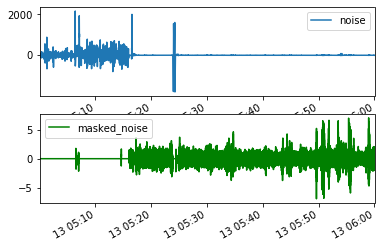

In [39]:
fig, ax = plt.subplots(nrows=2)
ch1and2[["noise"]].plot(ax=ax[0], alpha=1)
ch1and2[["masked_noise"]].plot(ax=ax[1], alpha=1, color="green")

In [40]:
ch1and2["corrected_masked_noise"] = ch1and2.masked_noise

In [41]:
is_not_science = data.sdtype != 0

In [42]:
ch1and2.loc[is_not_science, "corrected_masked_noise"] = 0

Text(0.5, 1.0, 'Corrected masked noise')

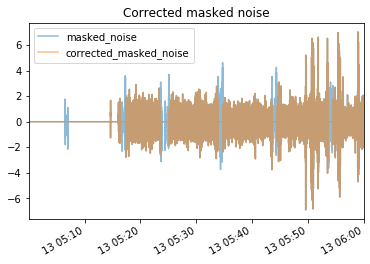

In [43]:
fig, ax = plt.subplots()
ch1and2[["masked_noise"]].plot(ax=ax, alpha=0.5)
ch1and2[["corrected_masked_noise"]].plot(ax=ax, alpha=0.5)
plt.title("Corrected masked noise")
# ch1and2[["noise"]].plot(secondary_y=True, ax=ax, alpha=0.5)

In [44]:
term = noise.values[:, np.newaxis] * row

In [45]:
term.shape

(28128, 21)

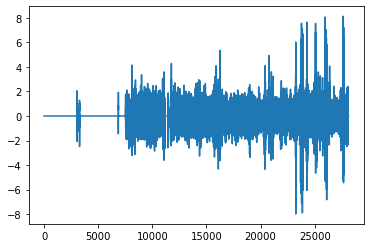

In [46]:
plt.figure()
plt.plot(term[:, 3])

In [47]:
ch = data.filter(regex="a6_").copy()

In [48]:
ch_corr = ch - term

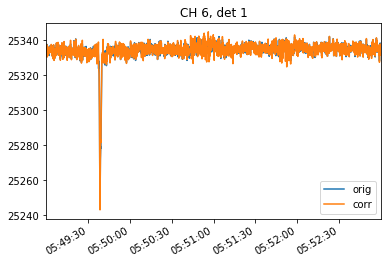

In [49]:
_, ax = plt.subplots()
ch[t1:t2].a6_01.plot(ax=ax, label="orig")
ch_corr[t1:t2].a6_01.plot(ax=ax, label="corr")
plt.title("CH 6, det 1")
plt.legend()

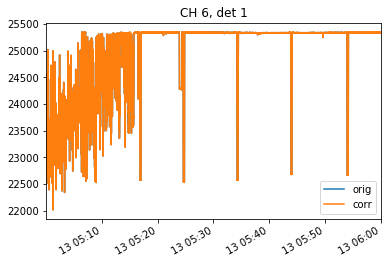

In [50]:
_, ax = plt.subplots()
ch.a6_01.plot(ax=ax, label="orig")
ch_corr.a6_01.plot(ax=ax, label="corr")
plt.title("CH 6, det 1")
plt.legend()

Text(0.5, 1.0, '(orig - corr) / orig')

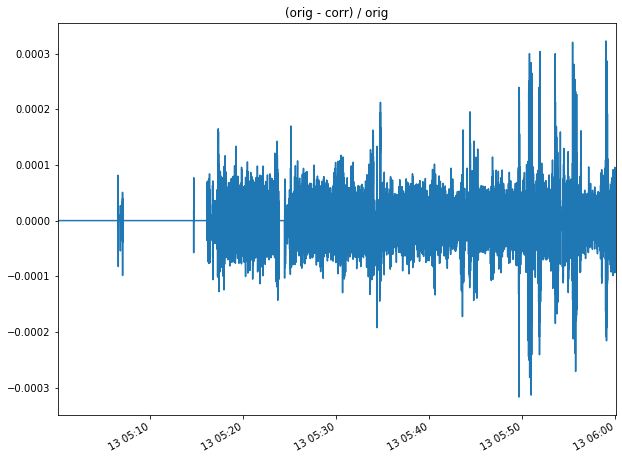

In [54]:
_, ax = plt.subplots(figsize=(10,8))
((ch.a6_01 - ch_corr.a6_01)/ ch.a6_01).plot(ax=ax)
plt.title("(orig - corr) / orig")

In [93]:
term.shape

(28128, 21)

In [219]:
data.ix[:, 'a3_01':'a3_21'] -= term

In [70]:
factors.shape

(21, 9)

In [ ]:
for i in range(2, 9):
        if i < 6:
            # a3..a6
            ch = "a" + str(i + 1)
        else:
            # b1..b3
            ch = "b" + str(i - 6 + 1)
        row = factors[:, i]
        term = noise.values[:, np.newaxis] * row
        data.ix[:, ch + "_01" : ch + "_21"] -= term